In [15]:
import pandas as pd

import os

from matplotlib import pyplot as plt
import seaborn as sns





/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

15
0.6595044732093811
42
0.4135211110115051


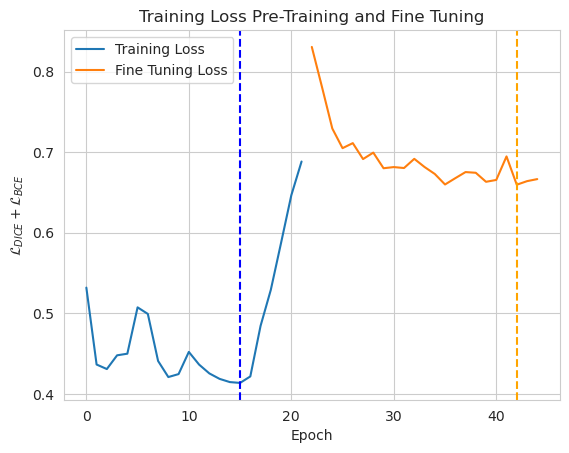

In [23]:
# Plot training & validation loss values using seaborn and save the results as pdf files
loss_training_df = pd.read_csv("../unet_training.csv")
loss_fine_tuning_df = pd.read_csv("../unet_fine_tuning.csv")

# Seaborn set style to all vertical and horizontal lines on a white background
sns.set_style("whitegrid")

# Set the y min to 0
# plt.ylim(0, None)


sns.lineplot(data=loss_training_df, x="Step", y="Value", label="Training Loss")
sns.lineplot(data=loss_fine_tuning_df, x="Step", y="Value", label="Fine Tuning Loss")
# Draw a vertical line at the lowest value of "Value" in the loss_training_df dataset
plt.axvline(x=loss_training_df["Step"][loss_training_df["Value"].idxmin()], color="b", linestyle="--", label="Lowest Training Loss")
plt.axvline(x=loss_fine_tuning_df["Step"][loss_fine_tuning_df["Value"].idxmin()], color="orange", linestyle="--", label="Lowest Training Loss")


print(loss_training_df["Step"][loss_training_df["Value"].idxmin()])
print(loss_fine_tuning_df["Value"].min())
print(loss_fine_tuning_df["Step"][loss_fine_tuning_df["Value"].idxmin()])
print(loss_training_df["Value"].min())


plt.title("Training Loss Pre-Training and Fine Tuning")
plt.xlabel("Epoch")
plt.ylabel("$\mathcal{L}_{DICE} + \mathcal{L}_{BCE}$")
plt.savefig("unet_training_loss.pdf")


23 23
20
0.4110272824764251
33
0.518321692943573


/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lumoe/anaconda3/envs/interdisciplinary/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

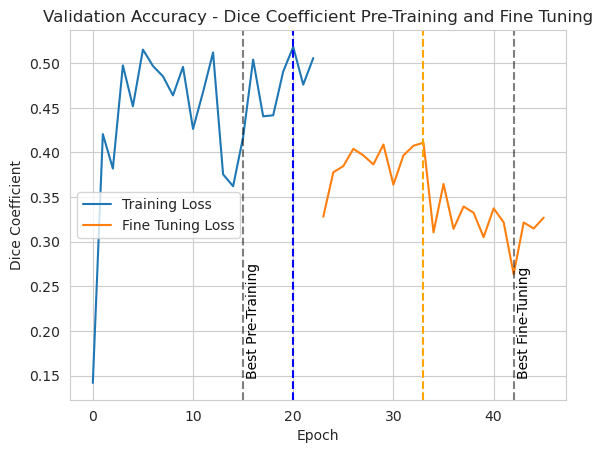

In [45]:
loss_training_df = pd.read_csv("../unet_training_eval.csv")
loss_fine_tuning_df = pd.read_csv("../unet_fine_tuning_eval.csv")


# Replace the value in the Step column with the row number
loss_training_df["Step"] = loss_training_df.index
loss_fine_tuning_df["Step"] = loss_fine_tuning_df.index

# Smooth the values of loss_training_df to the length of loss_fine_tuning_df, such that both datasets have the same length

# Step 1: Determine length difference
length_diff = len(loss_training_df) - len(loss_fine_tuning_df)

# Step 2: Calculate window size for running mean
window_size = int(len(loss_training_df) / length_diff)

# Step 3: Apply running mean to the second DataFrame
df2_smoothed = loss_training_df['Value'].rolling(window=window_size).mean().dropna().reset_index(drop=True)

# Truncate or extend df2_smoothed to make it the same length as df1
if len(df2_smoothed) > len(loss_fine_tuning_df):
    df2_smoothed = df2_smoothed[:len(loss_fine_tuning_df)]
elif len(df2_smoothed) < len(loss_fine_tuning_df):
    df2_smoothed = pd.concat([df2_smoothed, df2_smoothed.tail(len(loss_fine_tuning_df) - len(df2_smoothed))]).reset_index(drop=True)

# Now df1 and df2_smoothed have the same length
print(len(loss_fine_tuning_df), len(df2_smoothed))

loss_training_df["Value"] = df2_smoothed


# Add count of rows where the value is not NaN
loss_fine_tuning_df["Step"] += len(loss_training_df["Value"].dropna(inplace=False))

# Plot training & validation loss values using seaborn and save the results as pdf files

# Seaborn set style to all vertical and horizontal lines on a white background
sns.set_style("whitegrid")

# Set the y min to 0
# plt.ylim(0, None)

print(loss_training_df["Step"][loss_training_df["Value"].idxmax()])
print(loss_fine_tuning_df["Value"].max())
print(loss_fine_tuning_df["Step"][loss_fine_tuning_df["Value"].idxmax()])
print(loss_training_df["Value"].max())


sns.lineplot(data=loss_training_df, x="Step", y="Value", label="Training Loss")
sns.lineplot(data=loss_fine_tuning_df, x="Step", y="Value", label="Fine Tuning Loss")
# Draw a vertical line at the lowest value of "Value" in the loss_training_df dataset
plt.axvline(x=loss_training_df["Step"][loss_training_df["Value"].idxmax()], color="b", linestyle="--", label="Lowest Training Loss")
plt.axvline(x=loss_fine_tuning_df["Step"][loss_fine_tuning_df["Value"].idxmax()], color="orange", linestyle="--", label="Lowest Training Loss")

# Draw two lines at the x position of 15 and 42 in a lighter orange and blue color
plt.axvline(x=15, color="black", linestyle="--", alpha=0.5)
plt.axvline(x=42, color="black", linestyle="--", alpha=0.5)

# Add labels to these positions
plt.text(15.3, 0.15, "Best Pre-Training", color="black", alpha=1, rotation=90)
plt.text(42.3, 0.15, "Best Fine-Tuning", color="black", alpha=1, rotation=90)


plt.title("Validation Accuracy - Dice Coefficient Pre-Training and Fine Tuning")
plt.xlabel("Epoch")
plt.ylabel("Dice Coefficient")
plt.savefig("unet_validation_accuracy.pdf")

In [18]:
loss_training_df

,Wall time,Step,Value
0,1.692620e+09,0,0.141750
1,1.692620e+09,1,0.420658
2,1.692620e+09,2,0.381990
3,1.692620e+09,3,0.497571
4,1.692620e+09,4,0.451772
...,...,...,...
107,1.692638e+09,107,NaN
108,1.692639e+09,108,NaN
109,1.692639e+09,109,NaN
110,1.692639e+09,110,NaN
